In [1]:
import os
# running from Root directory
os.chdir("..")

In [2]:
from motif_search_main import load_network_from_args
from utils.export_import import import_results
from utils.logs import log_motif_criteria_args, log_motif_results, log_sub_graph_args, log_randomizer_args, log_motifs_table
from utils.types import MotifCriteriaArgs, MotifType, MotifName
import matplotlib.pyplot as plt
import networkx as nx
from typing import Union
import numpy as np
from collections import defaultdict
import plotly.express as px
import pandas as pd

In [41]:
dir_ = 'results/synapse_threshold_experiment/'

# to load the networks need a little fix - this API / schema has changed a bit, and those bin files aren't updated 
# args.input_network_file = "/".join(args.input_network_file.strip("/").split('/')[1:])
# network = load_network_from_args(args)

def read_z_scores_as_func_of_m(net_experiment: str):
    df = pd.DataFrame()
    for file in os.listdir(dir_):
        if not file.startswith(net_experiment):
            continue
            
        data = import_results(f'{dir_}/{file}')
        args = data['args']
        motifs = data['motifs']
    
        row_ = {'m' : args.synapse_threshold}
        for motif_id in motifs: 
            motif = motifs[motif_id]
            title_name =  f'{motif.name.value}-{motif.id}' if motif.name.value != MotifName.na else motif.id
            row_[str(title_name)] = motif.motif_criteria.z_score
    
        df = pd.concat([df, pd.DataFrame.from_dict(row_, orient='index').T], ignore_index=True)
    
    cols = list(df.columns)
    cols.remove('m')
    df_ = df.melt(id_vars='m', value_vars=cols)
    fig = px.scatter(df_,
                     x='m',
                     y='value',
                     color='variable',
                     labels={
                         "m": "M - synapse_threshold",
                         "value": "Z score",
                         "variable": "Motif Id"
                     },
                     title=f'Z-score as a function of M. network: {net_experiment}')
    
    fig.show()


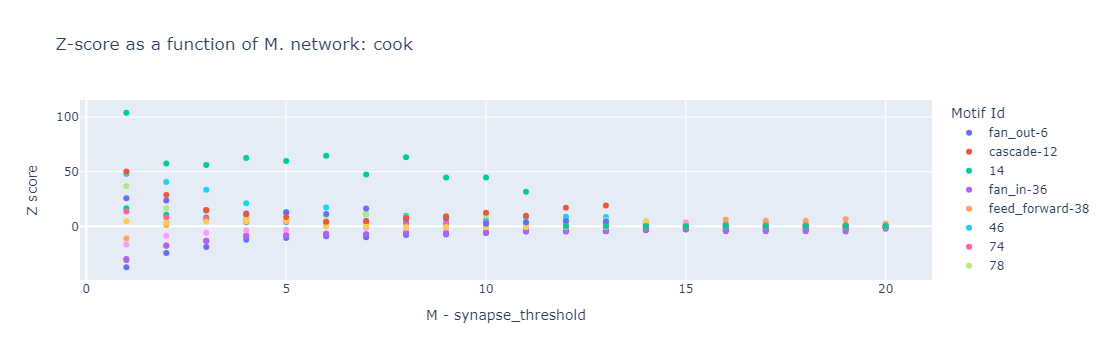

In [42]:
read_z_scores_as_func_of_m('cook')

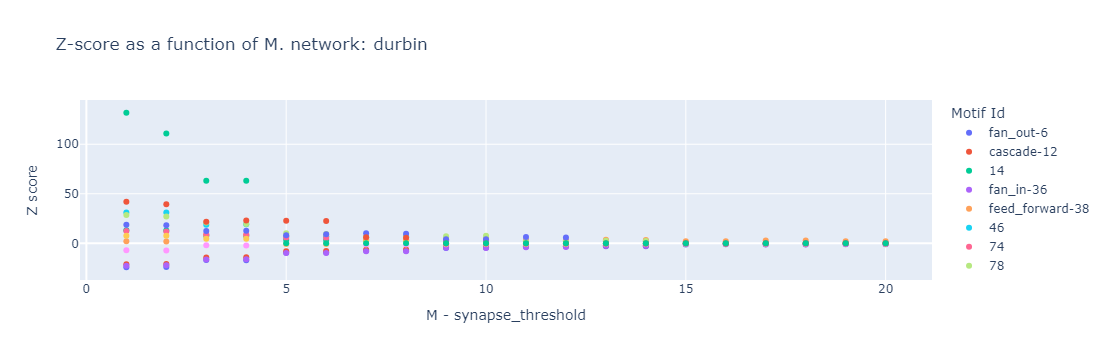

In [43]:
read_z_scores_as_func_of_m('durbin')